In [1]:
from mastermind import Mastermind
from q_learning import QLearningAgent

import random
import numpy as np
from itertools import combinations, combinations_with_replacement, product
import matplotlib.pyplot as plt

In [2]:
def plot_learning_curve(episode_returns, title):
    n_agents = episode_returns.shape[1]
    fig,ax1 = plt.subplots(1,1)
    fig.suptitle(title)
    ax1.set_title('Mean undiscounted return of {} agents'.format(n_agents))
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Return')
    ax1.grid()

    ax1.plot(np.mean(episode_returns,axis=1),color='k');
    fig.tight_layout()

In [3]:
env = Mastermind(n_pegs=3,n_colours=3,n_rows=10, codes=None)

In [5]:
def test_policy(agent, env, n_episodes, codes=None, render = False):
    test_returns = []
    for _ in range(n_episodes):
            if codes:
                code = random.choice(codes)
            else:
                code = None
            cumulative_reward=0
            state = env.reset(code)
            state_hash = state.tobytes()
            if render:
                env.render()
            terminal = False
            while not terminal:
                action = agent.policy(state_hash, test=True)
                next_state, reward, terminal, _ = env.step(list(action))
                if render:
                    env.render()
                next_state_hash = next_state.tobytes()
                state = next_state
                state_hash = next_state_hash
                cumulative_reward+=reward
            test_returns.append(cumulative_reward)
    return test_returns


In [6]:
def q_control(env,gamma=0.9,eps=0.15,alpha=0.2,n_agents=20,n_episodes=150, n_tests = 1000, codes = None):
    returns = np.zeros((n_episodes, n_agents))
    test_returns = np.zeros((n_agents,n_tests))
    for i in range(n_agents):
        agent = QLearningAgent(env,gamma,eps,alpha)        
        for episode in range(n_episodes):
            if codes:
                code = random.choice(codes)
            else:
                code = None
            cumulative_reward=0
            state = env.reset(code)
            state_hash = state.tobytes()
            terminal = False
            while not terminal:
                action = agent.policy(state_hash)
                next_state, reward, terminal, _ = env.step(list(action))
                next_state_hash = next_state.tobytes()
                agent.update_q_table(state_hash, action, reward, next_state_hash)
                state = next_state
                state_hash = next_state_hash
                cumulative_reward+=reward
            returns[episode][i] = cumulative_reward
        test_returns[i] = test_policy(agent,env,n_tests, False)
    return returns, test_returns


In [12]:
returns, test_performance = q_control(env=env,n_agents=50, alpha=0.5, eps=0.15, n_episodes = 100_000, codes=None)

Average performance in evaluation: 7.14436


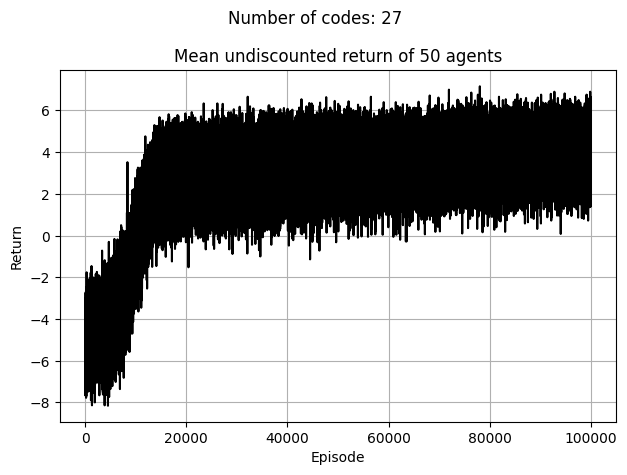

In [13]:
plot_learning_curve(returns,f'Number of codes: {len(env.actions)}')
print(f"Average performance in evaluation: {np.mean(test_performance)}")